## Task 1: Data Preprocessing

#### 1. Importing libraries

In [93]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 2. Load the dataset using Python

In [94]:
df = pd.read_csv('sample_dataset.csv')
df.head()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


#### 3. EDA

In [95]:
# To check number of rows and columns
df.shape

(1000, 10)

In [96]:
# To check missing value
df.isna().sum()

ID             0
OverallQual    0
GrLivArea      0
YearBuilt      0
TotalBsmtSF    0
FullBath       0
HalfBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

##### Note - No missing values found in given dataset

In [97]:
# To check Data type of given features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           1000 non-null   int64
 1   OverallQual  1000 non-null   int64
 2   GrLivArea    1000 non-null   int64
 3   YearBuilt    1000 non-null   int64
 4   TotalBsmtSF  1000 non-null   int64
 5   FullBath     1000 non-null   int64
 6   HalfBath     1000 non-null   int64
 7   GarageCars   1000 non-null   int64
 8   GarageArea   1000 non-null   int64
 9   SalePrice    1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


#### Note - All given features found are numerical(int64)

In [98]:
# To get statistical insight of data
df.describe()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.61700,1996.309000,1960.760000,1740.401000,2.506000,0.994000,2.038000,484.786000,270963.885000
std,288.819436,2.92076,883.054538,35.169351,1007.061464,1.135453,0.809085,1.406604,282.732658,129264.336981
min,1.000000,1.00000,500.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50363.000000
25%,250.750000,3.00000,1223.750000,1931.000000,838.750000,1.000000,0.000000,1.000000,239.000000,157806.750000
50%,500.500000,6.00000,1966.000000,1963.000000,1733.000000,3.000000,1.000000,2.000000,500.000000,268642.500000
75%,750.250000,8.00000,2800.000000,1991.000000,2599.500000,4.000000,2.000000,3.000000,705.500000,385333.250000
max,1000.000000,10.00000,3499.000000,2022.000000,3499.000000,4.000000,2.000000,4.000000,1000.000000,499208.000000


In [99]:
# To get feature names
df.columns

Index(['ID', 'OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF',
       'FullBath', 'HalfBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [100]:
# Assigned the target feature 'SalePrice' to y & remaining features(except 'ID') to x 
x = df.drop(['ID','SalePrice'], axis=1)
y = df['SalePrice']

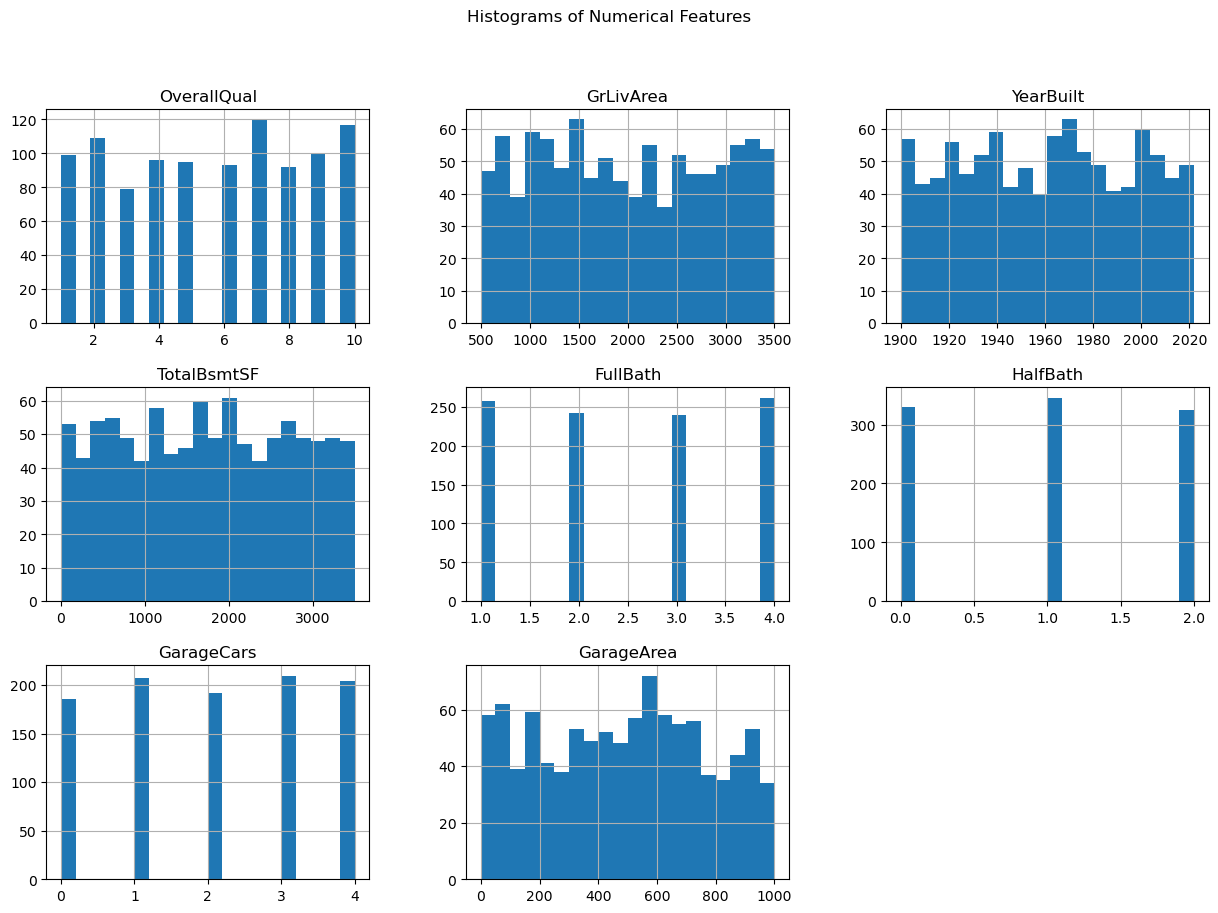

In [101]:
# Plotted histograms to get visual representations of data
x.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

#### 4. Feature Selection

<AxesSubplot:>

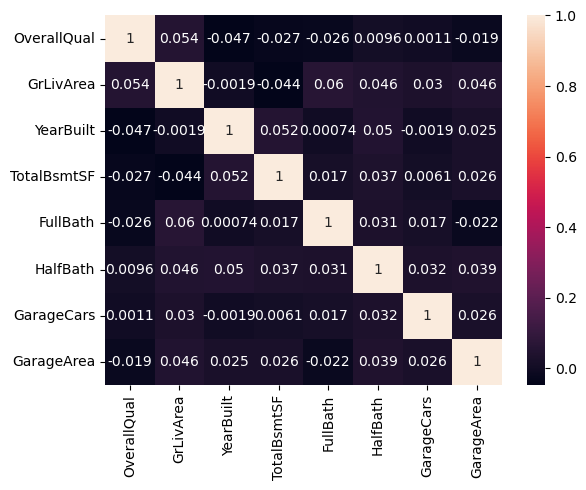

In [102]:
sns.heatmap(data= x.corr(), annot=True)

HalfBath        2.530790
GarageCars      3.107414
GarageArea      3.967954
TotalBsmtSF     4.018390
OverallQual     4.705110
FullBath        5.905379
GrLivArea       6.193006
YearBuilt      22.396170
dtype: float64


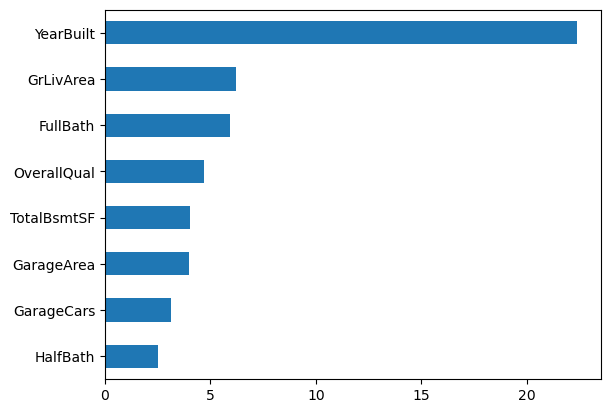

In [103]:
# VIF (Variance inflation factor) - Feature selection technique
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind="barh")
print(s1.sort_values())

#### Note - As 'YearBuilt' feature getting VIF value 22.396170, so this feature can be dropped for further model building.

In [104]:
x_final = x.drop('YearBuilt',axis=1)
vif_list = []
for i in range(x_final.shape[1]):
    vif = variance_inflation_factor(x_final.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index=x_final.columns)
s1.sort_values()

HalfBath       2.439144
GarageCars     2.886293
TotalBsmtSF    3.467102
GarageArea     3.520050
OverallQual    3.937686
FullBath       4.765072
GrLivArea      5.161987
dtype: float64

#### Note - The above are final feature selected to build model

In [105]:
x_final.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'HalfBath',
       'GarageCars', 'GarageArea'],
      dtype='object')

#### 5. Split the data into training and testing sets

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_final,y,test_size=0.20,random_state=40)

In [107]:
x_train.shape, x_test.shape

((800, 7), (200, 7))

## Task 2: Regression

In [108]:
# Train data fit on Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [109]:
# Evaluation on Training data before scaling

y_pred = lr_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred)
print("MSE\n",mse)

mae = mean_absolute_error(y_train,y_pred)
print("MAE\n",mae)

r2 = r2_score(y_train,y_pred)
print("R2\n",r2)

MSE
 16509967506.67243
MAE
 110755.89045694555
R2
 0.010649638370788694


In [110]:
# Evaluation on Testing data

y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)

r2 = r2_score(y_test,y_pred)
print("R2\n",r2)

MSE
 17170163681.154112
MAE
 111278.46518501993
R2
 -0.03839533247139948


#### Prediction on Test data

In [111]:
# Take random input for prediction on test data
x_test.head(1)

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea
204,1,2586,2845,4,0,2,476


In [112]:
x_final.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'HalfBath',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [113]:
OverallQual = 1
GrLivArea = 2586
TotalBsmtSF = 2845
FullBath = 4
HalfBath = 0
GarageCars = 2 
GarageArea = 476

In [114]:
# To make array to give input to model for prediction
column_names = x_final.columns
test_array = np.zeros(x_final.shape[1])
test_array[0] = OverallQual
test_array[1] = GrLivArea
test_array[2] = TotalBsmtSF
test_array[3] = FullBath
test_array[4] = HalfBath
test_array[5] = GarageCars
test_array[6] = GarageArea
test_array

array([1.000e+00, 2.586e+03, 2.845e+03, 4.000e+00, 0.000e+00, 2.000e+00,
       4.760e+02])

In [115]:
# To get final predicted SalePrice of house.

print(f'Predicted SalePrice is {np.around(lr_model.predict([test_array])[0])}')

Predicted SalePrice is 285493.0


### Explanation of Model Predictions

In [ ]:
1. Feature Importance: I can analyze the feature importances provided by the VIF to understand which features 
    have the most significant impact on predicting house prices. 
    Features with higher importances contribute more to the predictions.
    In our case I dropped feature 'YearBuilt' as it having high vif value.
    
2. Individual Predictions: In the test dataset, we can analyze the model predictions and compare them with 
    the actual house prices. This helps us understand how well the model performs on individual cases.

### Suggestions for Improvements

In [ ]:
1. Feature Engineering: We can explore creating new features or transforming existing ones to better capture
    the relationships between features and house prices.

2. Hyperparameter Tuning: Fine-tuning the hyperparameters of the Algorithm model can potentially improve its performance.
    Techniques like grid search CV or randomized search CV can help us find the optimal combination of hyperparameters.